# Avacado Project

## Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.


Content

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

#### Importing Libraries

In [1]:
import pandas  as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import scipy as stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Dataset
df=pd.read_csv('avocado.csv')
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

From above we can see that our dataset having 18249 rows and 14 columns. First column "Unnamed" is used as index and is of no use in model building, so we will drop this column. Our dataset has both numerical and catagorical type of data.

From above dataset we need to predict 

1. AveragePrice - We will use Regression as the data is continious in nature.
2. Region - We will use Classification technique here.


In [3]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


# 1. Average Price using Regression

## Exploratory Data Analysis (EDA)

In [7]:
# To get overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


From above dataset we can see only 3 object type column and remaining 10 columns are of numeic type. Date is considered as object datatype and separate entry of Year as integer. So we will separate the Date into month and day column.

Also we can see there is no null value present in our dataset.

In [4]:
#Splitting the Date to Year, Month and Day

df['Year'], df['Month'], df['Day'] = df['Date'].str.split('-').str
df.drop(columns=['Date','year'], inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [5]:
#Converting Object datatype for column Yesr to integer type after splitting.

df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Date']=df['Day'].astype(int)
df.drop(columns=['Day'], inplace=True)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  region        18249 non-null  object 
 11  Year          18249 non-null  int32  
 12  Month         18249 non-null  int32  
 13  Date          18249 non-null  int32  
dtypes: float64(9), int32(3), object(2)
memory usage: 1.7+ MB


In [12]:
# Checking count of null values from the dataset.
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Year            0
Month           0
Date            0
dtype: int64

From above, we can see that there are no missing values in the dataset.

<AxesSubplot:>

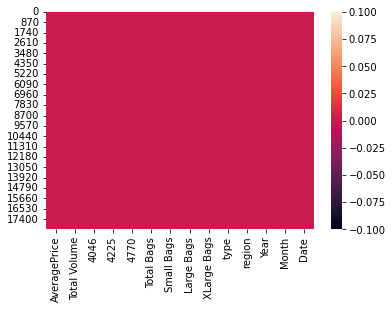

In [13]:
# Let's visualize the null values clearly through Heatmap
sns.heatmap(df.isnull())

In [14]:
# Statistical summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
Year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


By looking at above statistics, few columns has huge number and difficult to asume anything by just looking at the table.
Few features mean value is greater than median, that means data is skewed to the right. We will check the data skewness in detail.

Now Let's separate the Numerical and Catagorical columns

In [6]:
Catg_data = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['type', 'region']

Only 2 column have object type data.

In [7]:
Num_data = []
for x in df.dtypes.index:
    if df.dtypes[x] !='object':
        Num_data.append(x)
Num_data

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Date']

Total 12 columns have Integer type data.

### Data Visualisation

##### Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


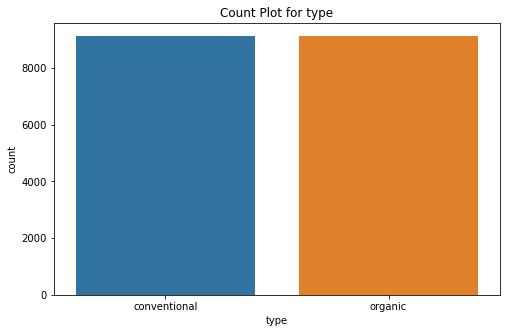

In [18]:
#Checking the count plot of Type
print(df["type"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["type"])
plt.title(f"Count Plot for type")
plt.show()

Type column has Conventional and Organic Avacado.Both types have almost equal count

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


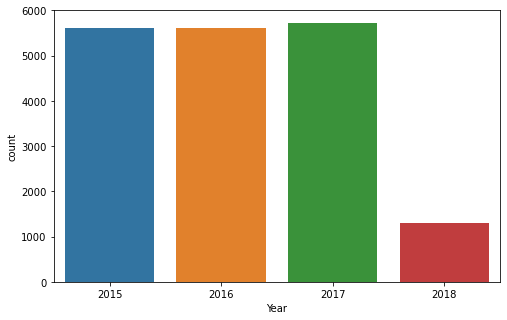

In [19]:
#Checking the count plot of Year
print(df["Year"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Year"])
plt.show()

As the dataset is available till May 2018, we can see very less count for 2018. Remaining 3 years have almost equal count.

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: Month, dtype: int64


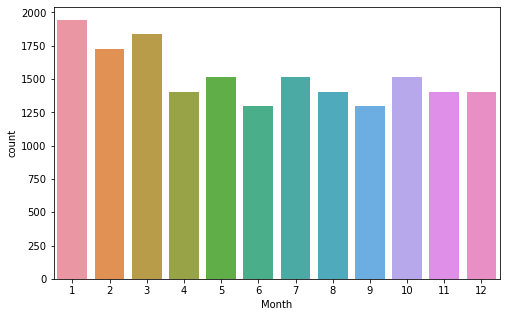

In [26]:
#Checking the count plot of Month
print(df["Month"].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(df["Month"])
plt.show()

January has the highest count and June has the lowest.

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

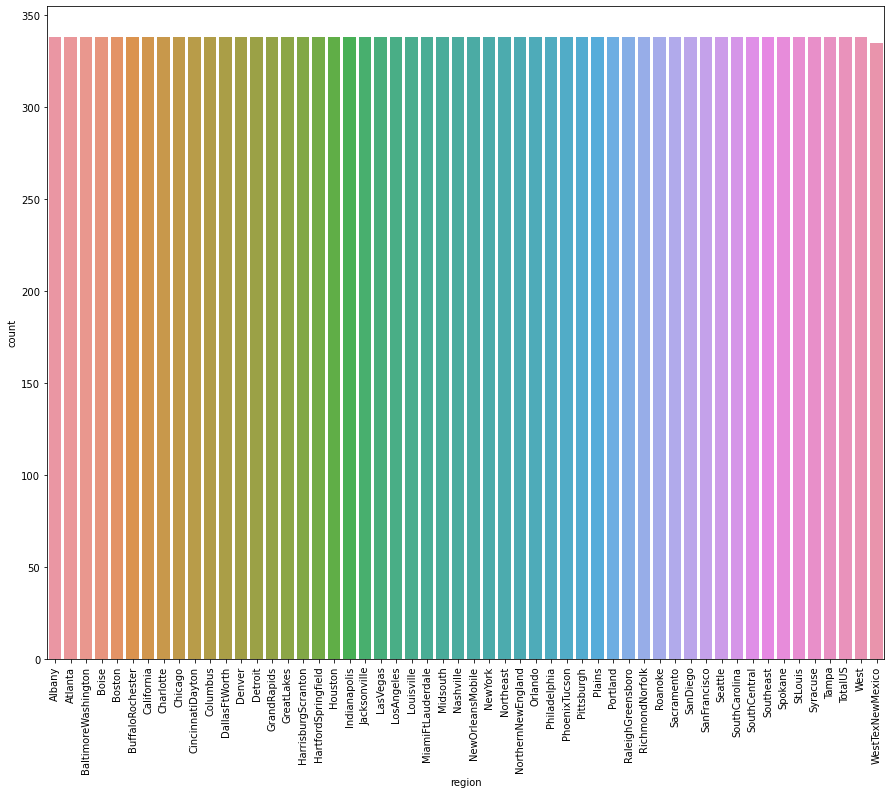

In [21]:
#Checking the count plot of region
print(df["region"].value_counts())
plt.figure(figsize=(15,12))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

Count is equal for all region except WestTexNewMexico       

##### Bivariate Analysis

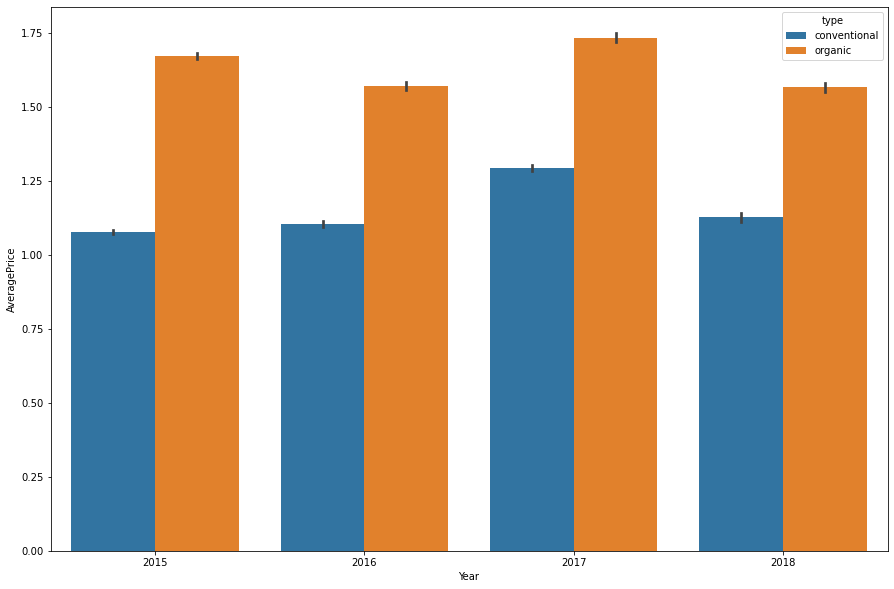

In [23]:
#Comparing average prices in different years

plt.figure(figsize=(15,10))
sns.barplot(x="Year", y="AveragePrice", hue="type", data=df)
plt.show()

By looking at above plot, we can see that Price was significantly higher in year 2017. As usual, Organic product has higher price than conventional product.

<Figure size 1080x720 with 0 Axes>

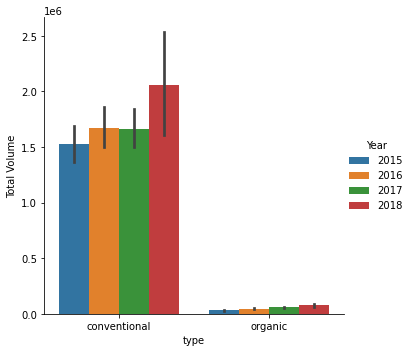

In [25]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="Year", kind="bar", data=df)
plt.show()

<Figure size 1080x720 with 0 Axes>

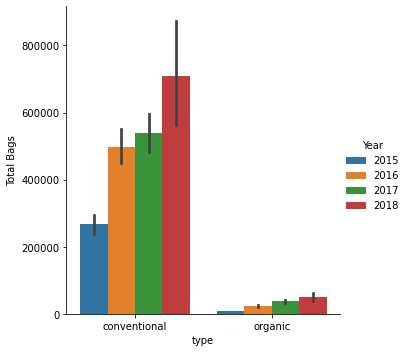

In [27]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="Year", data=df, kind="bar")
plt.show()

From above plot we can see that Conventional product sale is much higher than organic product.

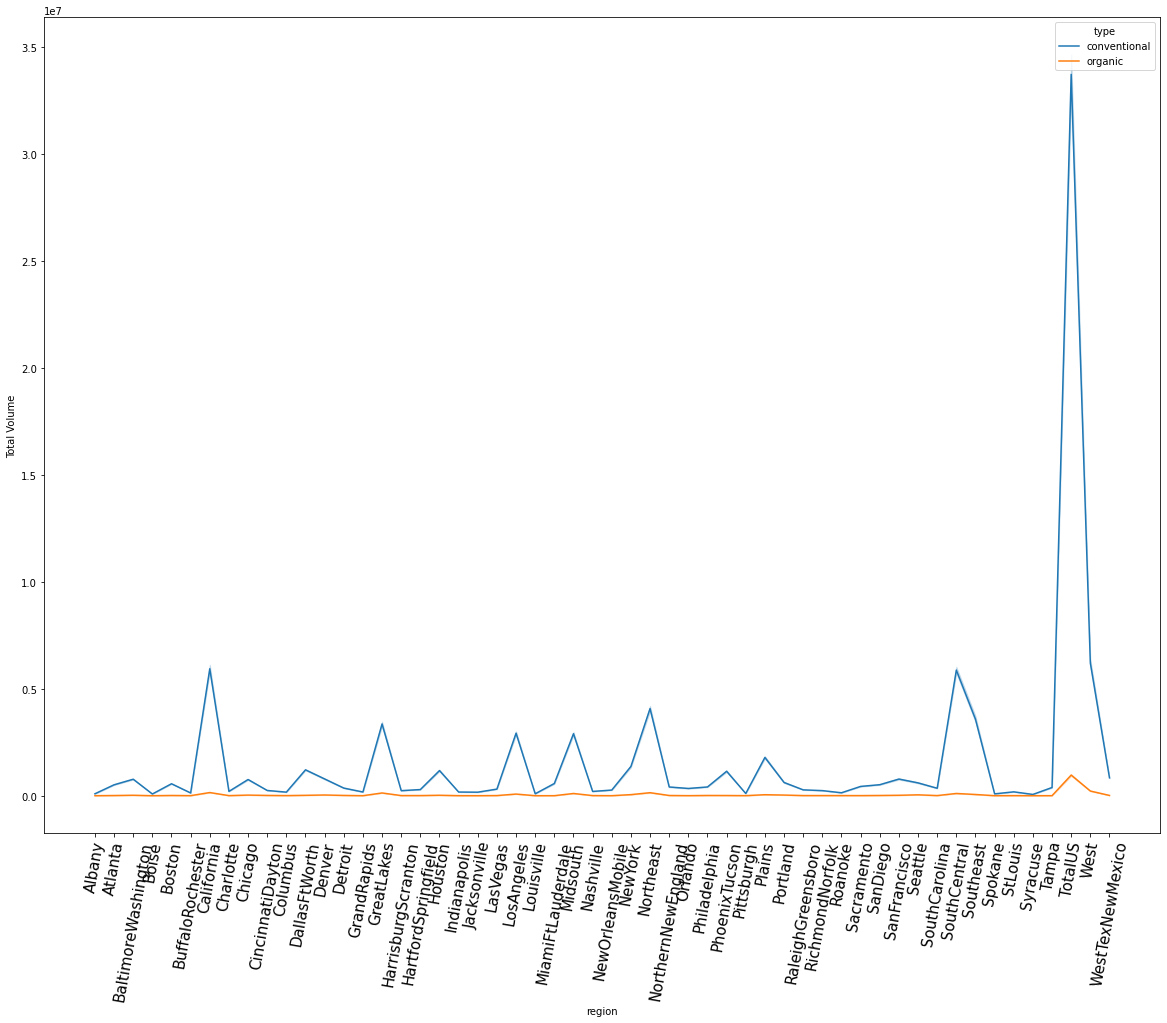

In [28]:
plt.figure(figsize=(20,15))
sns.lineplot(data=df, x='region',y='Total Volume', hue= 'type')
locs, labels = plt.xticks(fontsize= 15)
plt.setp(labels, rotation=80)
plt.show()

Here we can see TotalUS has the highest volume

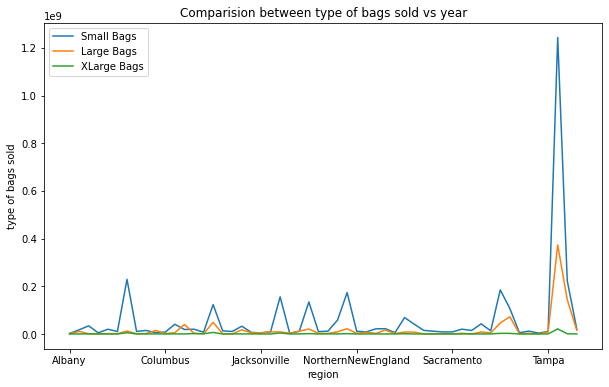

In [29]:
feature = df[["Small Bags","Large Bags","XLarge Bags"]].groupby(df.region).sum()
feature.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between type of bags sold vs year")
plt.xlabel("region")
plt.ylabel("type of bags sold")
plt.show()

Small bags size sold high in the region Tampa. The price of Small bag size is also high in this region followed by Large Bags Size and Xlarge Bags size was sold least.

##### Multivariate Analysis

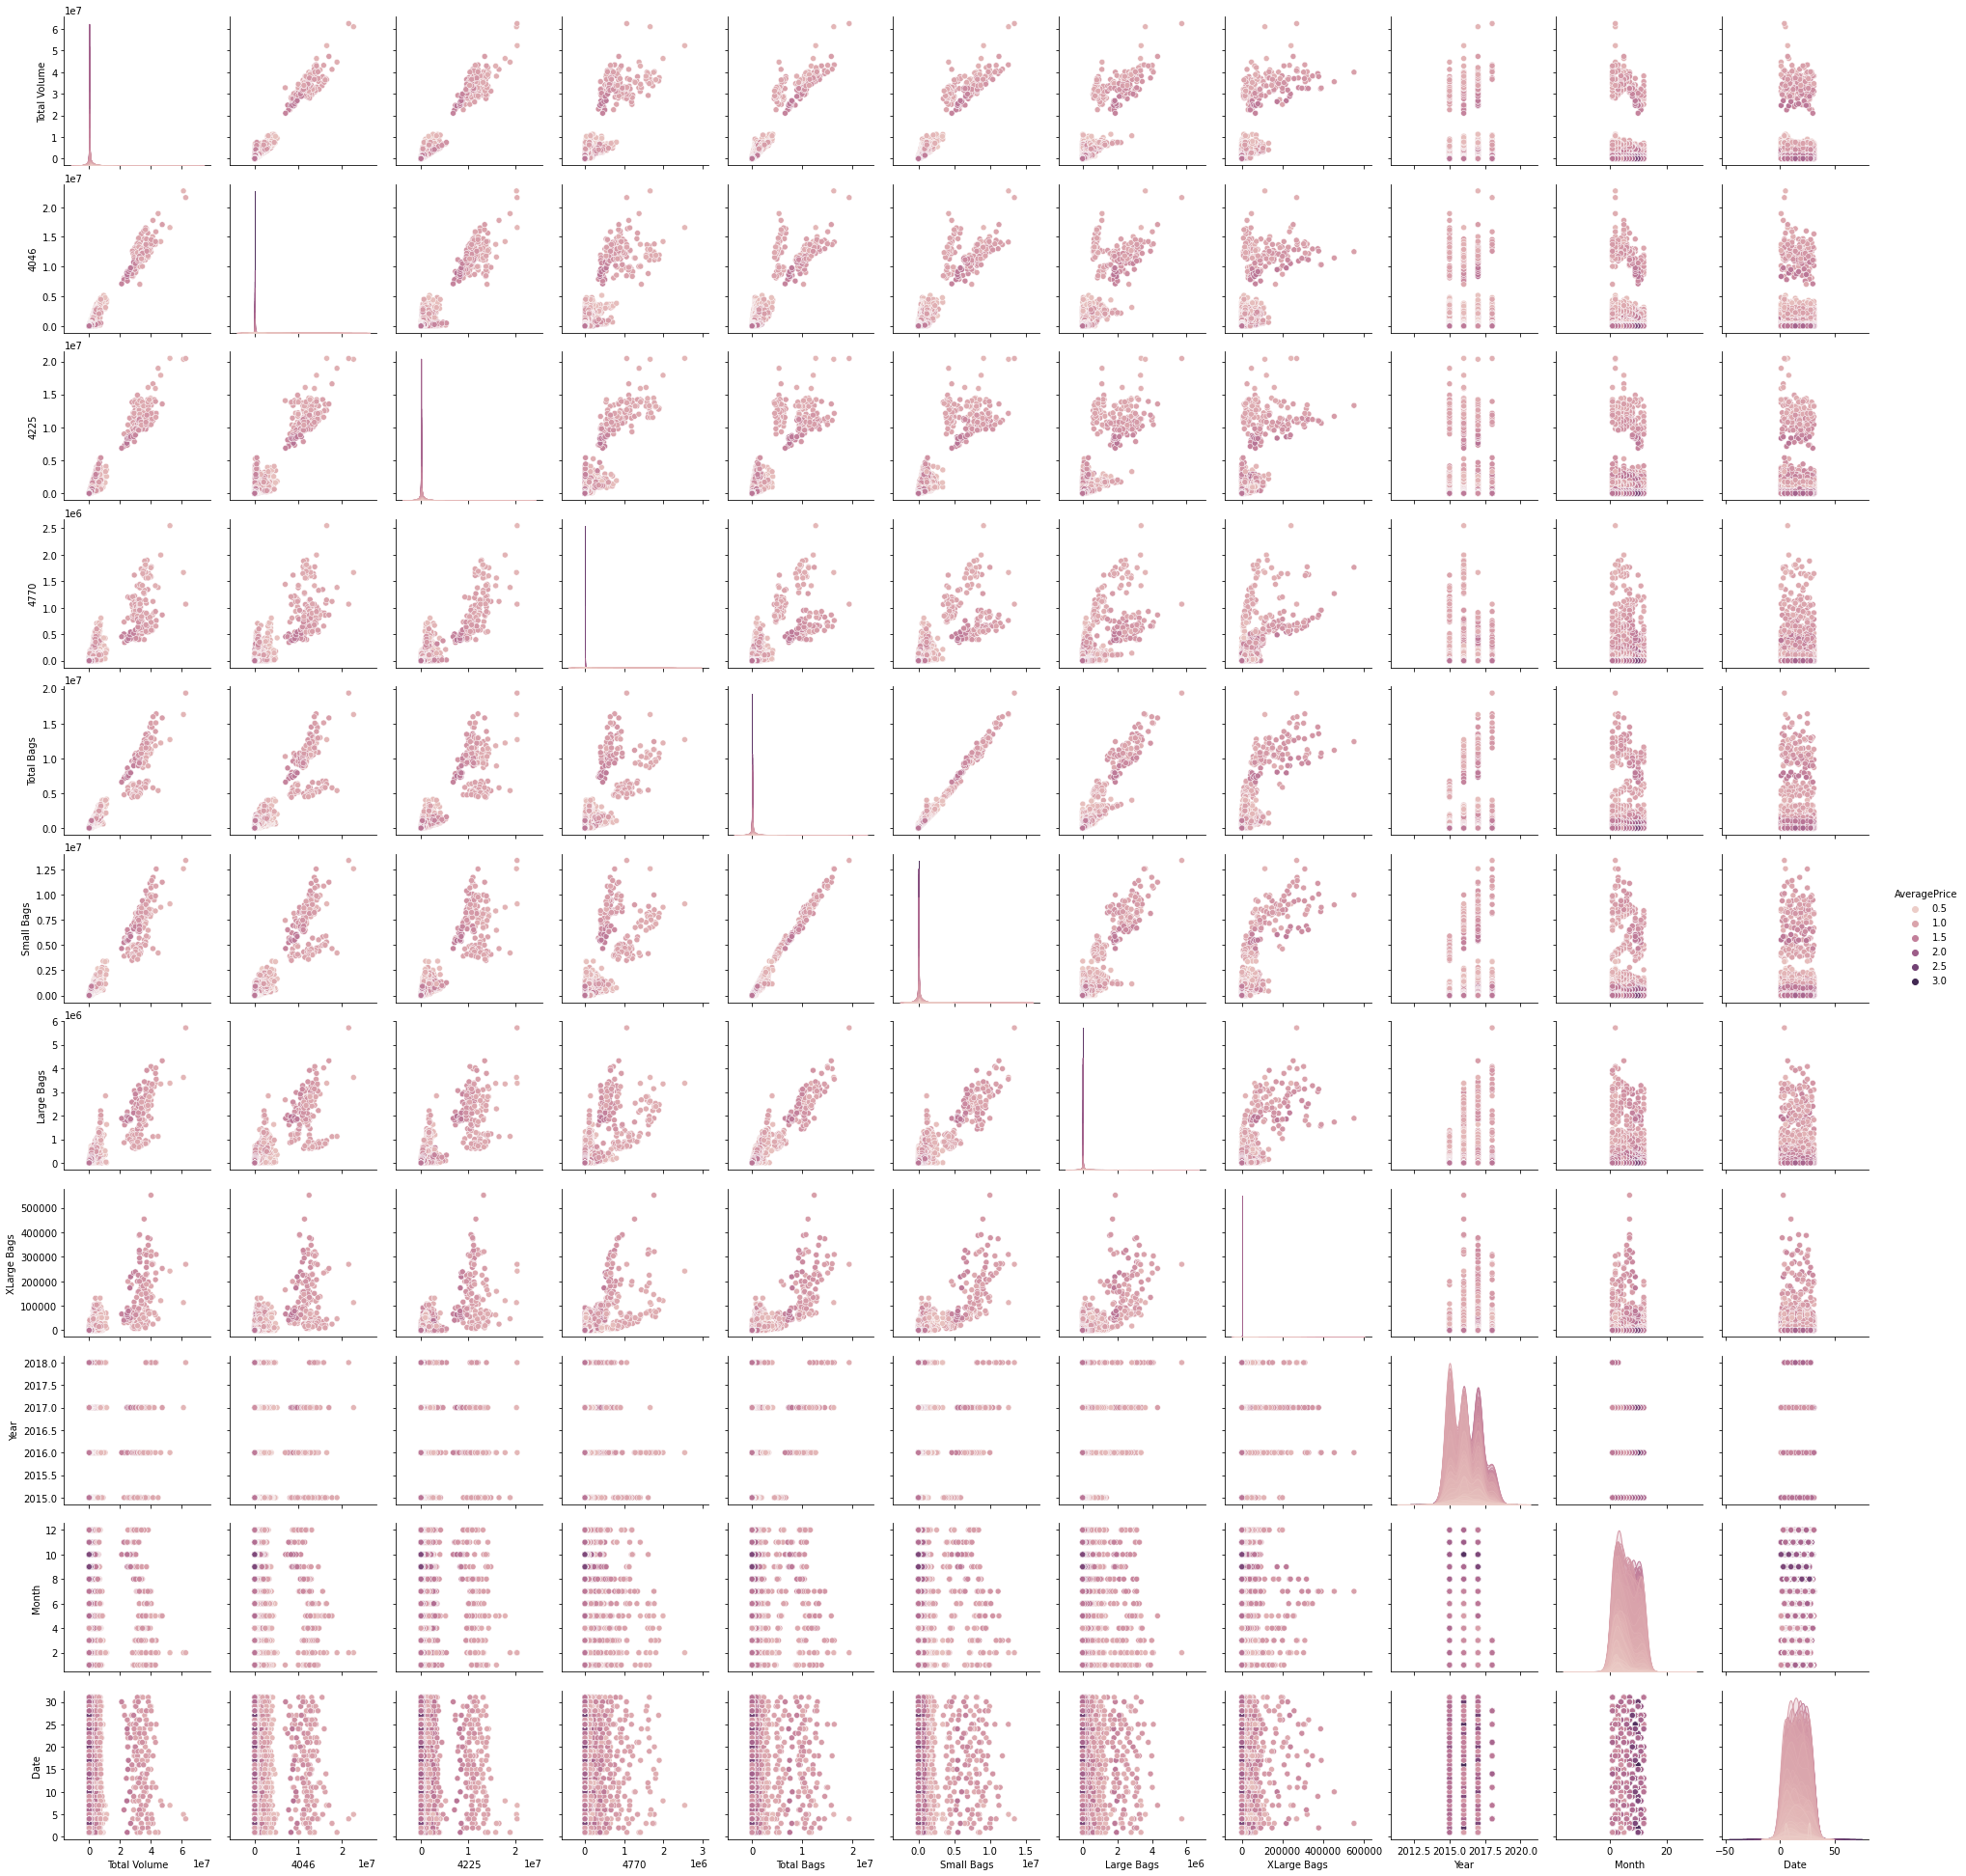

In [30]:
#Pair plot
sns.pairplot(df,hue="AveragePrice")

Since the data is big, it is difficult to analyze this pair plot. We will check vif to see if any multicolleniarity issue.

#### Encoding Catagorical Data

In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])

df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29


Now all object type data is converted to numerical format.

#### Correlation using HEAT map

In [32]:
cor = df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.081033,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000032,-0.000085,-0.000013


Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together. 

Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

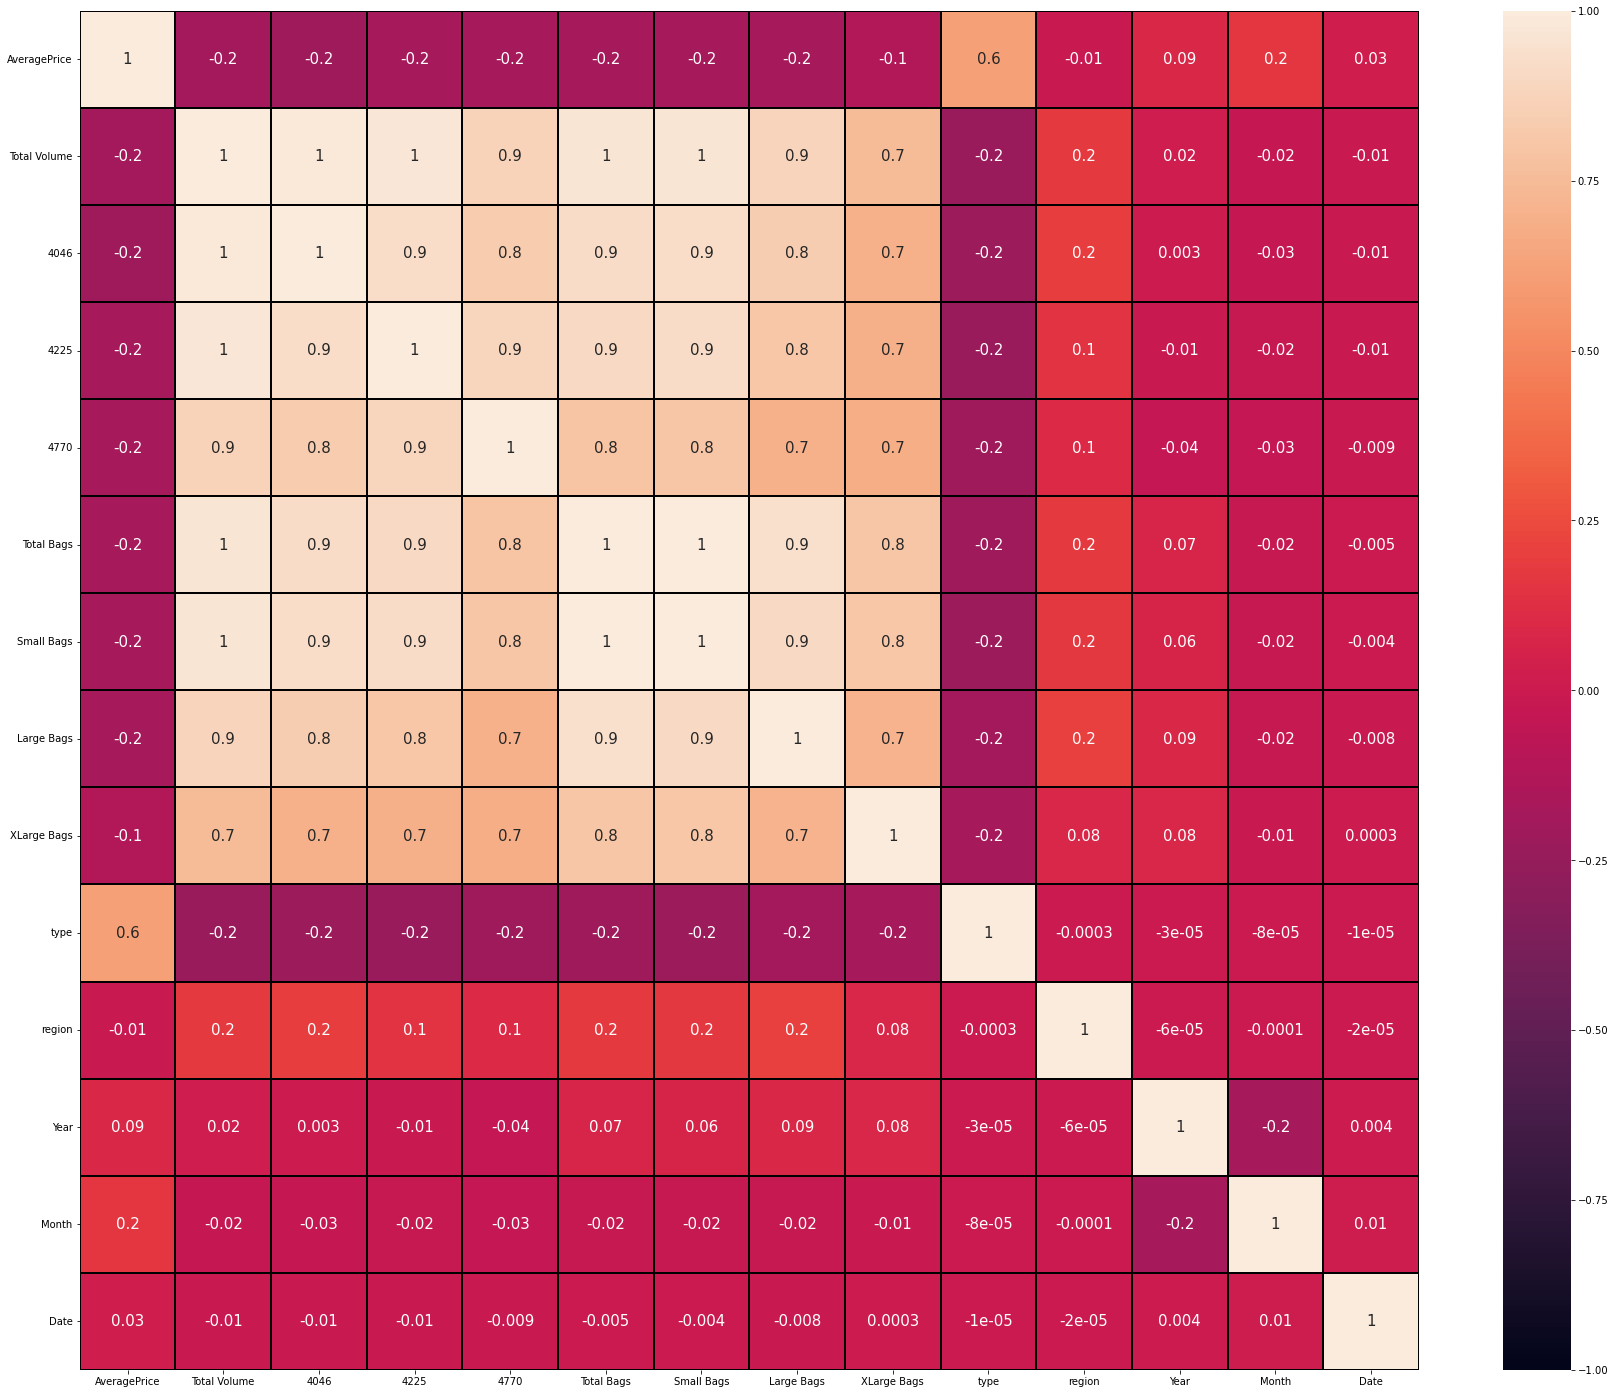

In [34]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

From above heat map we can see multicollinearity issue between features  "4046", "4225", "4770", "Small Bags", "Large Bags" and "XLarge Bags". We will drop these columns after cross checking coorrelation using VIF.

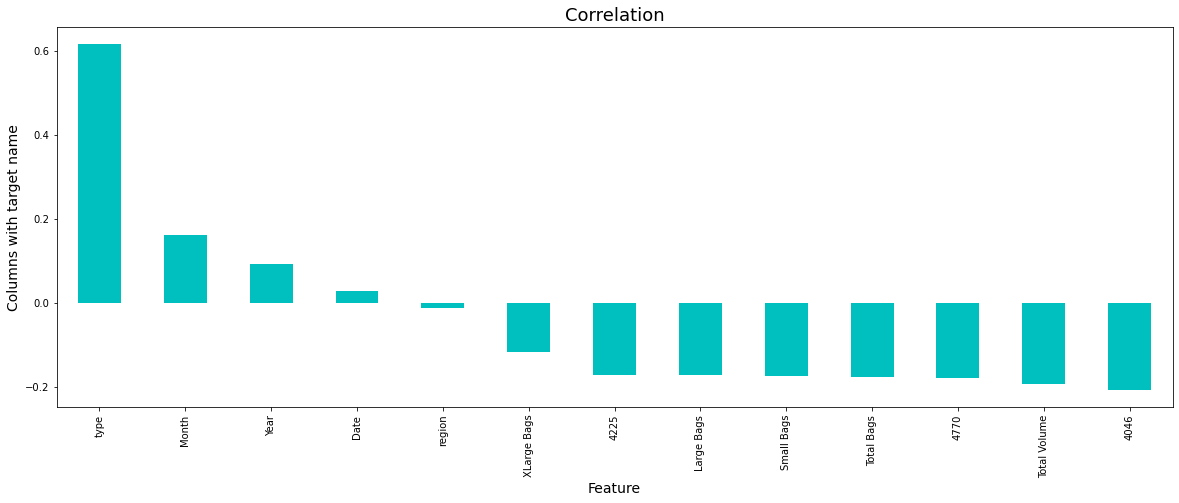

In [9]:
plt.figure(figsize=(20,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above bar plot we can see features like X kargebags, 4225, Large bags, Small bags,Total Bags, 4770, Total Volumes, and 4046 are negatively correlated.Region has almost no relation.

### Outliers

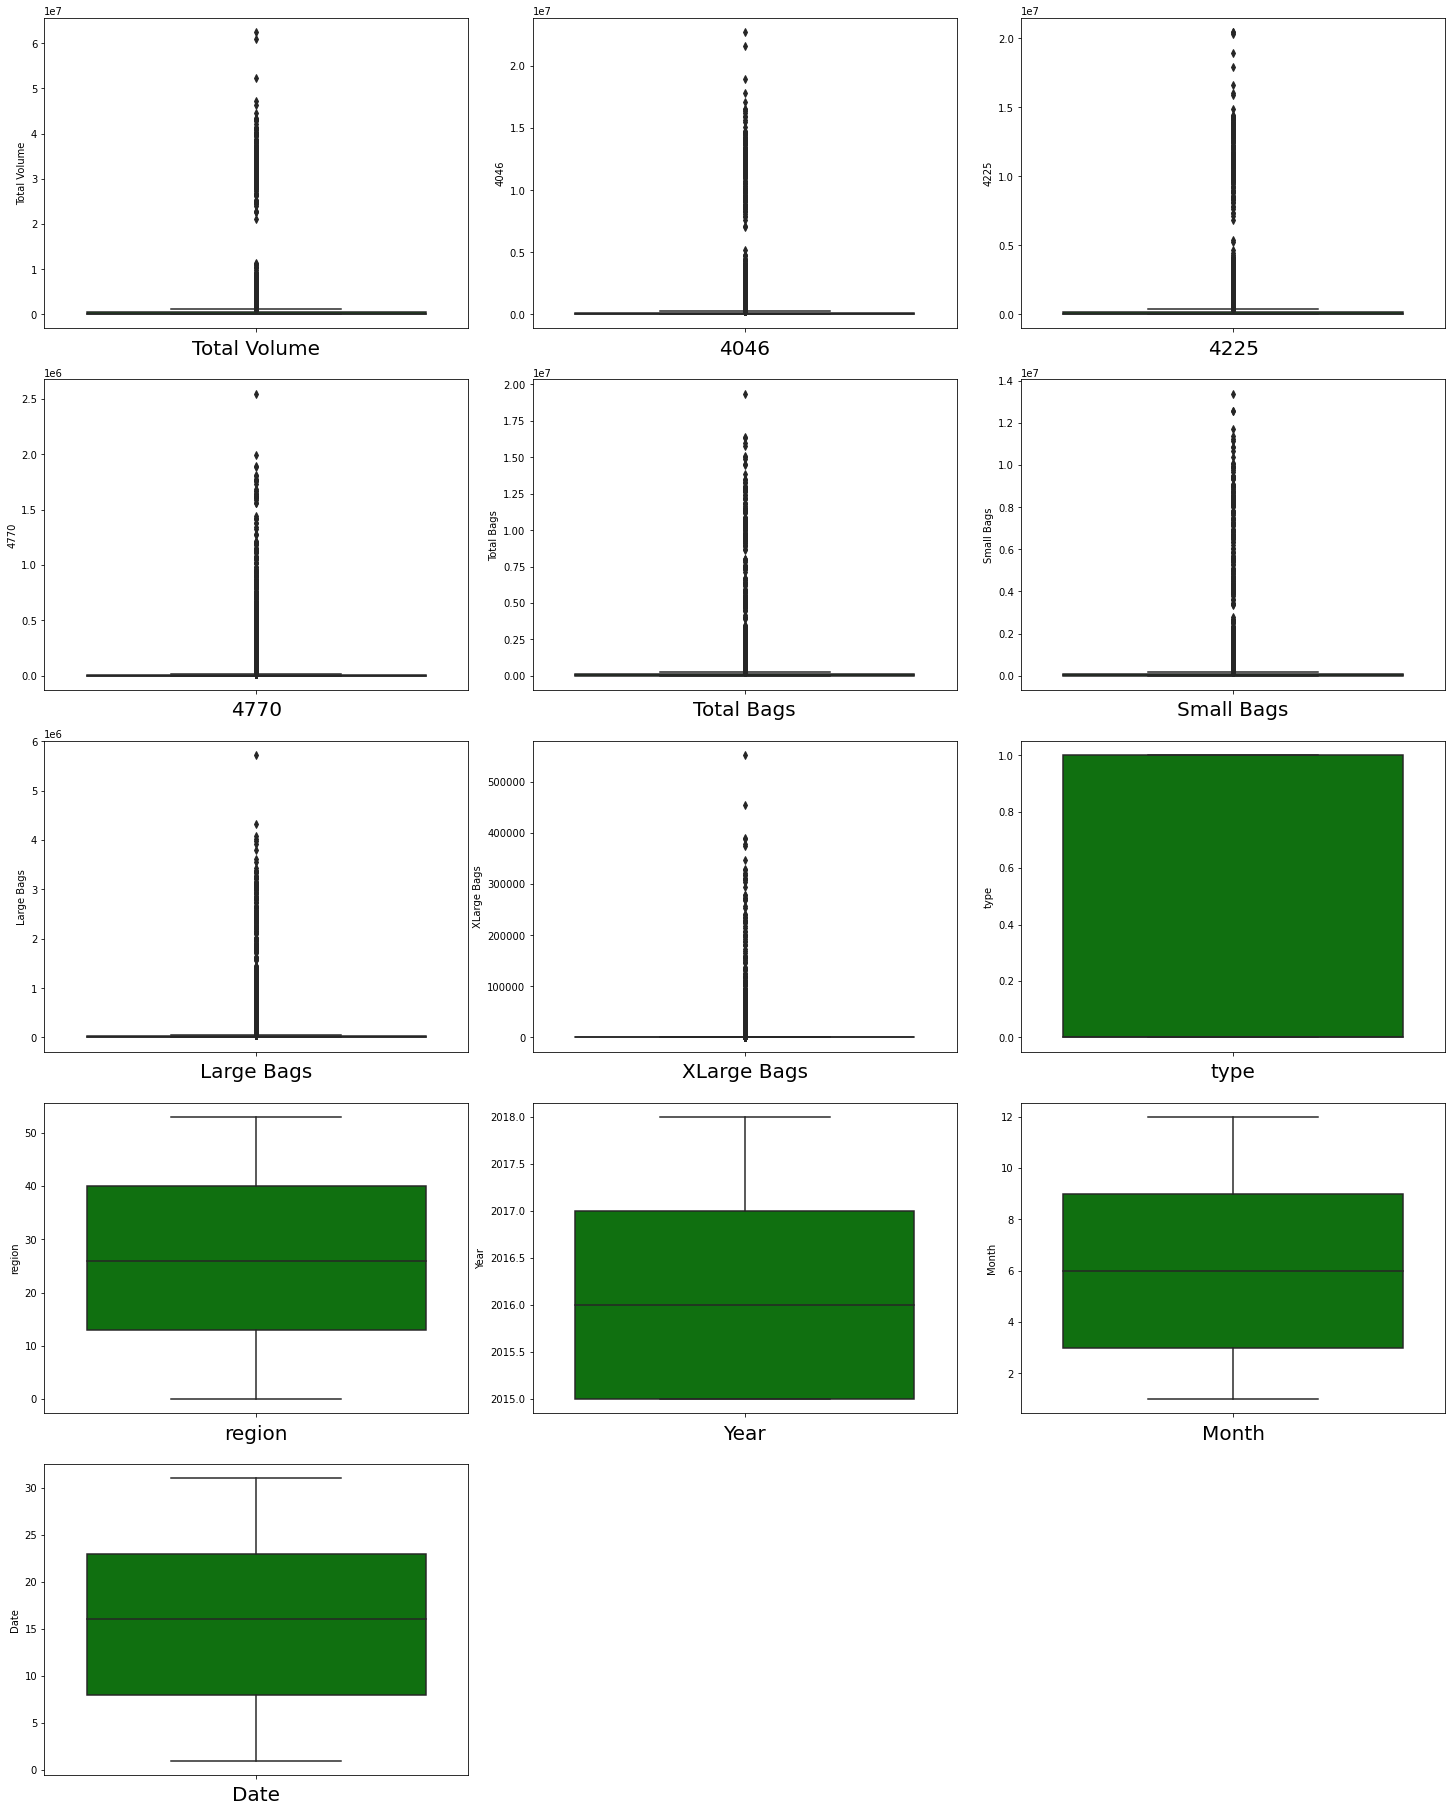

In [9]:
#Let's check the Outliers through Boxplot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(y=column, data=df,color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

From above Box plot we can see Outliers present in column 'Total Volume' and 'Total Bags'. We will now remove the Outliers through ZScore method.

##### Removing outliers using Zscore

In [10]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'region', 'Year',
       'Month', 'Date'],
      dtype='object')

In [10]:
#Features having Outliers
df1 = df[['Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [11]:
# Using zscore to remove outliers in the feature newpaper
from scipy.stats import zscore

z=np.abs(zscore(df1))

# Creating new dataframe
new_df=df[(z<3).all(axis=1)]
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,53,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,53,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,53,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,53,2018,1,14


In [11]:
df.shape

(18249, 14)

In [11]:
new_df.shape

(17782, 14)

In [12]:
# Let's check the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

In [12]:
df=new_df.copy() # Reassigning the changed dataframe name to our original dataframe name

### Skewness

In [13]:
# Checking the skewness
df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

We can see skewness on most of the features except few like Year, Month, Day. AveragePrice is our target vaiable, so we will ignore the skewness. 

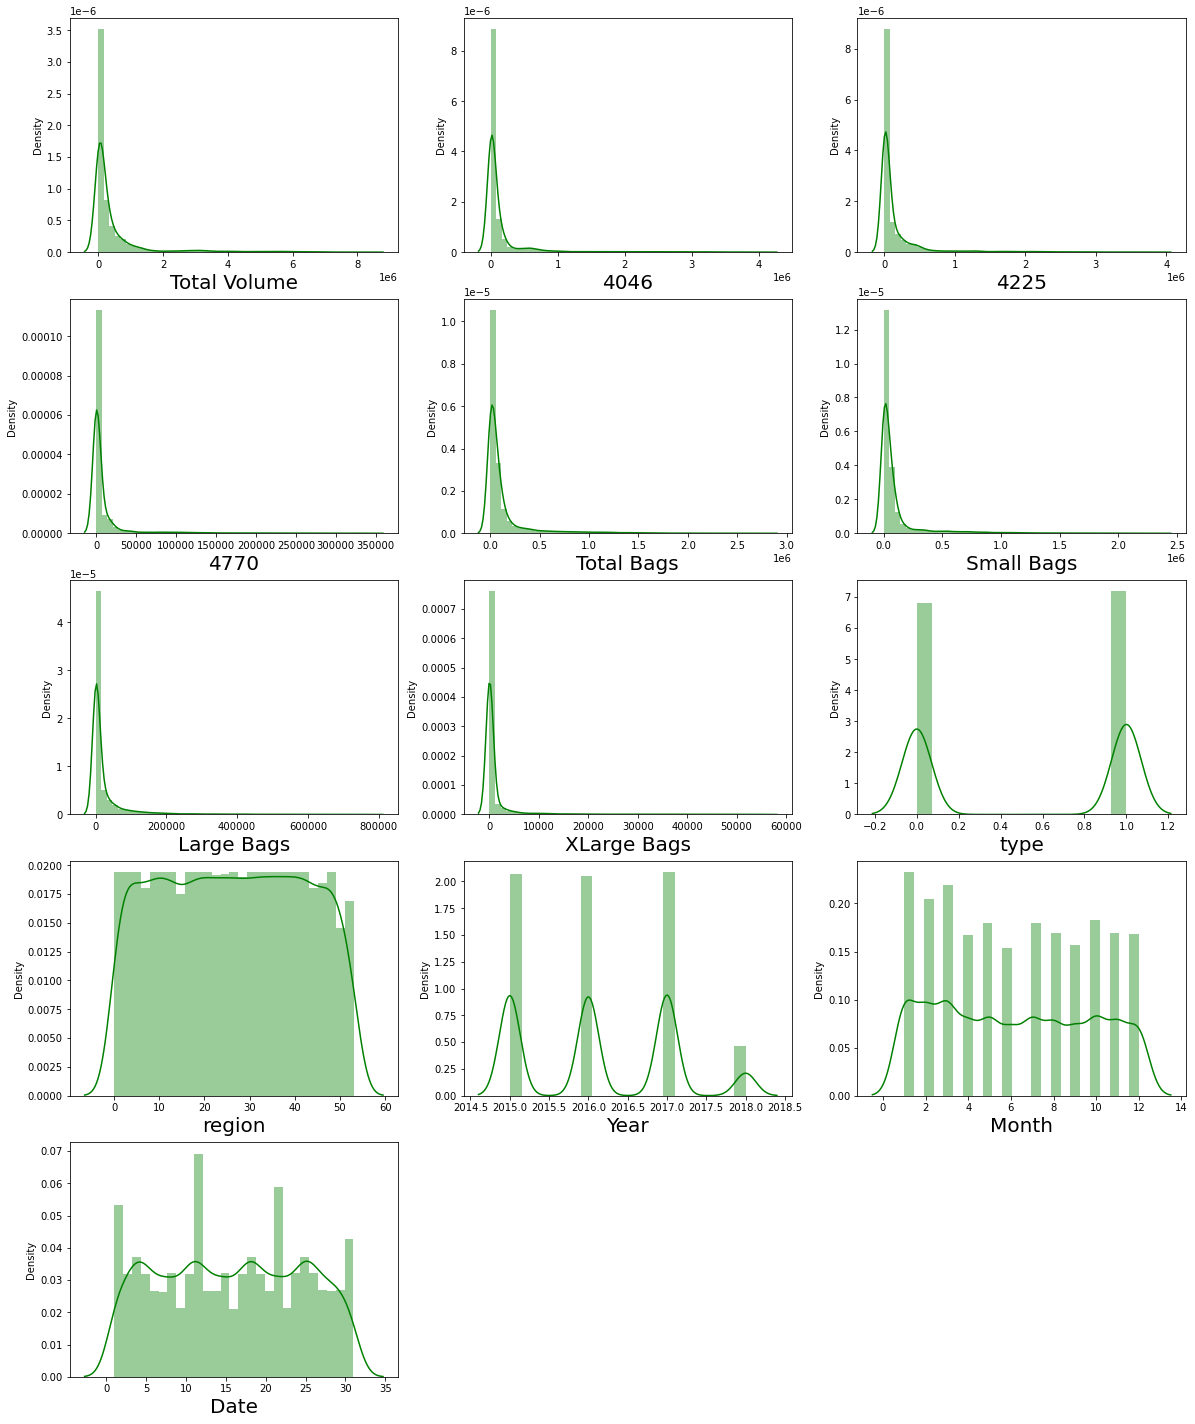

In [14]:
#Checking the skewness through Dist plot

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=13:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

From above plot, we can see skewness towards right on many features'

##### Removing skewness through power transform

In [15]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [16]:
df[features] = scaler.fit_transform(df[features].values)
df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [17]:
# Let's check the skewness after using yeo=johnson ethod
df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

Still we can see skewness on column XLarge Bags. Let's remove this through Log transform

In [18]:
# Removing skewness using log transformation
df["XLarge Bags"] = np.log1p(df["XLarge Bags"])

Applied log transform to remove the skewness.

In [19]:
df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
type           -0.052210
region          0.005773
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

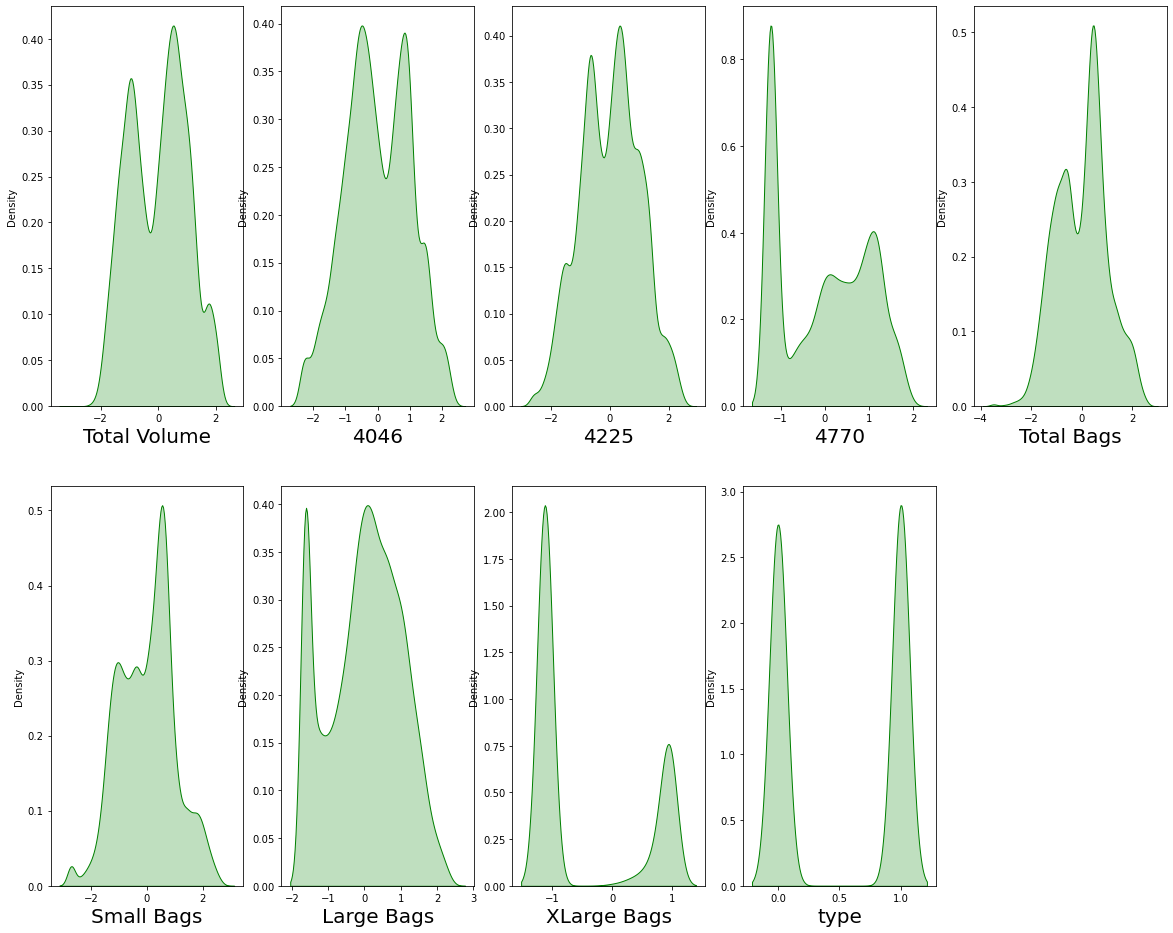

In [21]:
#Let's check the skewness again through Dist plot.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
features = df.drop("AveragePrice", axis=1)
for column in features:
    if plotnumber<=9:
        ax = plt.subplot(3,5,plotnumber)
        sns.distplot(df[column],color='g', hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [20]:
# Dropping irrelevant columns
df.drop("region",axis=1, inplace=True)
df.drop("XLarge Bags",axis=1, inplace=True)

In [21]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29


## Data preprocessing

##### Separating the independent and target variables into x and y

In [22]:
x = df.drop('AveragePrice', axis=1)
y = df['AveragePrice']

##### Scaling data with standard scaler

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.641434,1.289235
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.641434,0.491750
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.641434,-0.305734
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,1.641434,-1.103219
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.358706,1.517088


This is our scaled data using standard scaler.

#### Variance Inflation Factor(VIF)

From Heatmap we have checked  multi collinearity issue and drop few column. We will further check the VIF.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"]=x.columns
vif["VIF Value"]=[variance_inflation_factor(x.values, i)for i in range(len(x.columns))]
vif

,Features,VIF Value
0,Total Volume,51.519431
1,4046,6.752126
2,4225,11.107325
3,4770,3.890095
4,Total Bags,34.408868
5,Small Bags,16.622534
6,Large Bags,3.460516
7,type,3.320393
8,Year,1.332874
9,Month,1.048738


VIF value more that 10 for Total Volume, 4046, 4225,Total Bags, Small Bags. These columns has multicollinearity issue. We will check one by one column having higher value first.

In [25]:
x.drop("Total Volume",axis=1, inplace=True)

In [26]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.535569,4046
1,4.271655,4225
2,3.869884,4770
3,24.481419,Total Bags
4,16.622115,Small Bags
5,3.415743,Large Bags
6,3.130034,type
7,1.328284,Year
8,1.046023,Month
9,1.000535,Date


In [27]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [28]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,3.516917,4046
1,4.127529,4225
2,3.869537,4770
3,4.094102,Small Bags
4,1.861818,Large Bags
5,3.127554,type
6,1.304576,Year
7,1.045423,Month
8,1.000355,Date


In [29]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29


## Modeling

#### Finding best random state

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [31]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.5258004026800944 on Random_state  140


So, here we are getting the maximum r2 score as 52.58% on the random state 140.

Now splitting the data for Training and Testing purpose. 70% we are considering for Training and 30% for Testing purpose

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

### Applying Regression Algorithms

##### Importing all the Regression Algorithms

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

### Linear Regression

In [34]:
# Checking R2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error(MAE):',mean_absolute_error(y_test, predLR))
print('Mean squared error(MSE):',mean_squared_error(y_test, predLR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print('The CV score  for Linear_regression is :',cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.5258004026800944
Mean abs error(MAE): 0.21640749309889779
Mean squared error(MSE): 0.07764341445389435
Root Mean squared error(RMSE): 0.27864567905118204
The CV score  for Linear_regression is : 0.09210284810290326


### Random Forest Regressor

In [35]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predRFR)))

# Checking cv score for Random Forest Regression
print("The CV  score for  the Random forest regressor is:",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8608470229014553
Mean abs error: 0.10446247422680412
Mean squared error: 0.022784313471415178
Root Mean squared error(RMSE): 0.15094473648132015
The CV  score for  the Random forest regressor is: 0.21570200508961399


### Decision Tree Regressor

In [36]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predDTR)))

# Checking cv score for Decision Tree Regression
print('The CV score  for  the Decision Tree Regression is :',cross_val_score(DTR,x,y,cv=5).mean())

R2_Score: 0.7165769063706828
Mean abs error: 0.1404161199625117
Mean squared error: 0.0464064854732896
Root Mean squared error(RMSE): 0.2154216457863267
The CV score  for  the Decision Tree Regression is : -0.3473229352106499


### KNN Regressor

In [37]:
# Checking R2 score for KNN regressor
knn=KNN()
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN Regression
print('The CV score  for  the KNN regressor is :',cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7773332886771042
Mean abs error: 0.13958013120899718
Mean squared error: 0.03645849522024368
Root Mean squared error(RMSE): 0.19094107787546313
The CV score  for  the KNN regressor is : 0.1334207389761051


### Support Vector Regressor

In [38]:
# Checking R2 score for KNN regressor
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('Mean abs error:',mean_absolute_error(y_test, predsvr))
print('Mean squared error:',mean_squared_error(y_test, predsvr))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR Regression
print('The CV score  for  the SVR regressor is :',cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7697343167165533
Mean abs error: 0.14205383029055463
Mean squared error: 0.03770271839692118
Root Mean squared error(RMSE): 0.1941718784915086
The CV score  for  the SVR regressor is : 0.18043208617358425


### Stochastic Gradient Descent Regressor

In [39]:
# Checking R2 score for SGD Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

#prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('Mean abs error:',mean_absolute_error(y_test, predSGD))
print('Mean squared error:',mean_squared_error(y_test, predSGD))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for SGD Regression
print('The  CV score for the SGD  regressor is :',cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.524754782855037
Mean abs error: 0.21652778751995272
Mean squared error: 0.07781461977312487
Root Mean squared error(RMSE): 0.27895271960159285
The  CV score for the SGD  regressor is : 0.07928331489516838


### Gradient Boosting Regressor

In [40]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)

#prediction
predGBR=GBR.predict(x_test)
print('R2_Score:',r2_score(y_test,predGBR))
print('Mean abs error:',mean_absolute_error(y_test, predGBR))
print('Mean squared error:',mean_squared_error(y_test, predGBR))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, predGBR)))

# Checking cv score for GBR Regression
print('The  CV score for the GradientBoosting  regressor is :',cross_val_score(GBR,x,y,cv=5).mean())

R2_Score: 0.7256372246458852
Mean abs error: 0.16118795091928673
Mean squared error: 0.04492298769956384
Root Mean squared error(RMSE): 0.21195043689401502
The  CV score for the GradientBoosting  regressor is : 0.3546552043489648


From the above observation, looking at the difference of R2 score and the cross validation score we conclude that Gradient Boosting is our best fitting model

### Hyperparameter tuning

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
#Linear Regression
parameters = {
        "n_estimators":[20,40,80,120,160,200],
        "max_depth":[1,3,5,7,9],
        "learning_rate":[0.01,0.1,1]
        }

In [43]:
GCV = GridSearchCV(GradientBoostingRegressor(), parameters, cv=5)

Using GridSearch CV for Hyperparameter tunning my best fit model

In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [20, 40, 80, 120, 160, 200]})

In [45]:
GCV.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200}

In [48]:
Avocado = GradientBoostingRegressor(learning_rate = 0.1, max_depth= 9, n_estimators= 200)
Avocado.fit(x_train, y_train)
pred_GCV = Avocado.predict(x_test)

print('R2_score:',r2_score(y_test,pred_GCV))
print('Mean abs error(MAE):',mean_absolute_error(y_test, pred_GCV))
print('Mean squared error(MSE):',mean_squared_error(y_test, pred_GCV))
print('Root Mean squared error(RMSE):',np.sqrt(mean_squared_error(y_test, pred_GCV)))

R2_score: 0.876989037589263
Mean abs error(MAE): 0.09909139483165064
Mean squared error(MSE): 0.02014128900743447
Root Mean squared error(RMSE): 0.14192000918628236


After tuning, model R2 score has increase to 87.69%

### Saving the model

In [50]:
# Saving the model using .pkl
import joblib
joblib.dump(Avocado,"Avocado_Price.pkl")

['Avocado_Price.pkl']

#### Predicting the saved model

In [51]:
# Loading the saved model
model=joblib.load("Avocado_Price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0.77673956, 0.87186427, 1.02927981, ..., 1.74374779, 1.0917939 ,
       2.2650339 ])

In [52]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8,9,...,5325,5326,5327,5328,5329,5330,5331,5332,5333,5334
Predicted,0.77674,0.871864,1.02928,1.808234,1.345649,1.376916,0.799785,1.14929,1.521098,1.014459,...,0.854027,1.096652,1.594979,0.819111,2.046995,1.285548,1.225829,1.743748,1.091794,2.265034
Original,0.76000,0.980000,0.96000,1.850000,1.370000,1.350000,0.750000,1.17000,1.500000,1.020000,...,0.730000,1.070000,1.640000,0.790000,2.170000,1.170000,1.220000,1.680000,0.870000,2.330000


Original and Predicted values are very close.

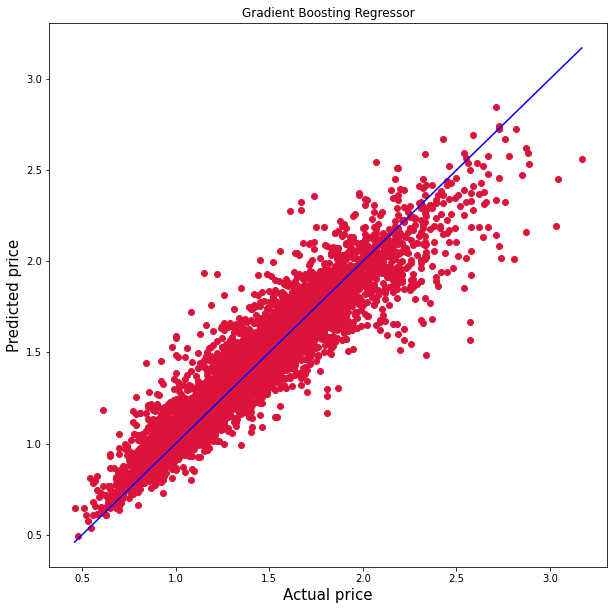

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("Gradient Boosting Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

# 2.Region using Classification

In [3]:
#Importing the Dataset
df_cl=pd.read_csv('avocado.csv')
df_cl.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Dropping the irrelevant column Unnamed:0
df_cl.drop("Unnamed: 0",axis=1, inplace=True)

In [5]:
#Splitting the Date to Year, Month and Day

df_cl['Year'], df_cl['Month'], df_cl['Day'] = df_cl['Date'].str.split('-').str
df_cl.drop(columns=['Date','year'], inplace=True)
df_cl

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


In [6]:
#Converting Object datatype for column Yesr to integer type after splitting.

df_cl['Year']=df_cl['Year'].astype(int)
df_cl['Month']=df_cl['Month'].astype(int)
df_cl['Date']=df_cl['Day'].astype(int)
df_cl.drop(columns=['Day'], inplace=True)

Now Let's separate the Numerical and Catagorical columns

In [7]:
Catg_data = []
for x in df_cl.dtypes.index:
    if df_cl.dtypes[x] == 'object':
        Catg_data.append(x)
Catg_data

['type', 'region']

In [8]:
Num_data = []
for x in df_cl.dtypes.index:
    if df_cl.dtypes[x] !='object':
        Num_data.append(x)
Num_data

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year',
 'Month',
 'Date']

Here 'region' is the target variable

In [9]:
df_cl['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
df_cl["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

#### Outliers

In first case we have Outliers present in the daraset. Let's remove them

In [10]:
# Features containing outliers
features = df_cl[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [11]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [12]:
# Creating new dataframe
new_df1 = df_cl[(z<3).all(axis=1)] 
new_df1

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Date
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1,14


In [13]:
# Checking the skewness
new_df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [14]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [15]:
new_df1[features] = scaler.fit_transform(new_df1[features].values)
new_df1[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [16]:
# Checking skewness after using yeo=johnson ethod
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

In [17]:
# Removing skewness using log transformation
new_df1["XLarge Bags"] = np.log1p(new_df1["XLarge Bags"])

In [18]:
# Let's check the skewness again
new_df1.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
Year            0.220792
Month           0.098217
Date            0.011251
dtype: float64

XLarge Bags still has skewness. Let's drop it.

In [19]:
new_df1.drop("XLarge Bags",axis=1, inplace=True)

In [20]:
new_df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Date
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,conventional,Albany,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,conventional,Albany,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,conventional,Albany,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,conventional,Albany,2015,12,6
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,conventional,Albany,2015,11,29


#### Encoding Catagorical Data

In [21]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df1[categorical_col]= new_df1[categorical_col].apply(LE.fit_transform)
new_df1[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


#### Correlation using HEAT map

In [22]:
cor = new_df1.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,region,Year,Month,Date
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,0.608447,0.010428,0.099910,0.157900,0.024742
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,-0.800828,0.065709,0.076584,-0.026332,-0.006248
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,-0.725826,0.159390,-0.002396,-0.025919,-0.004558
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,-0.747722,0.032273,-0.004533,-0.024708,-0.005919
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,-0.780988,0.037805,-0.051657,-0.017377,0.001383
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,-0.725686,0.065996,0.210924,-0.014571,-0.003703
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,-0.720466,0.051985,0.185955,-0.010260,-0.000535
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,-0.500026,0.086573,0.190295,-0.016942,-0.000876
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,1.000000,0.021970,0.007399,-0.005044,-0.002469
region,0.010428,0.065709,0.159390,0.032273,0.037805,0.065996,0.051985,0.086573,0.021970,1.000000,-0.003610,0.002175,0.000751


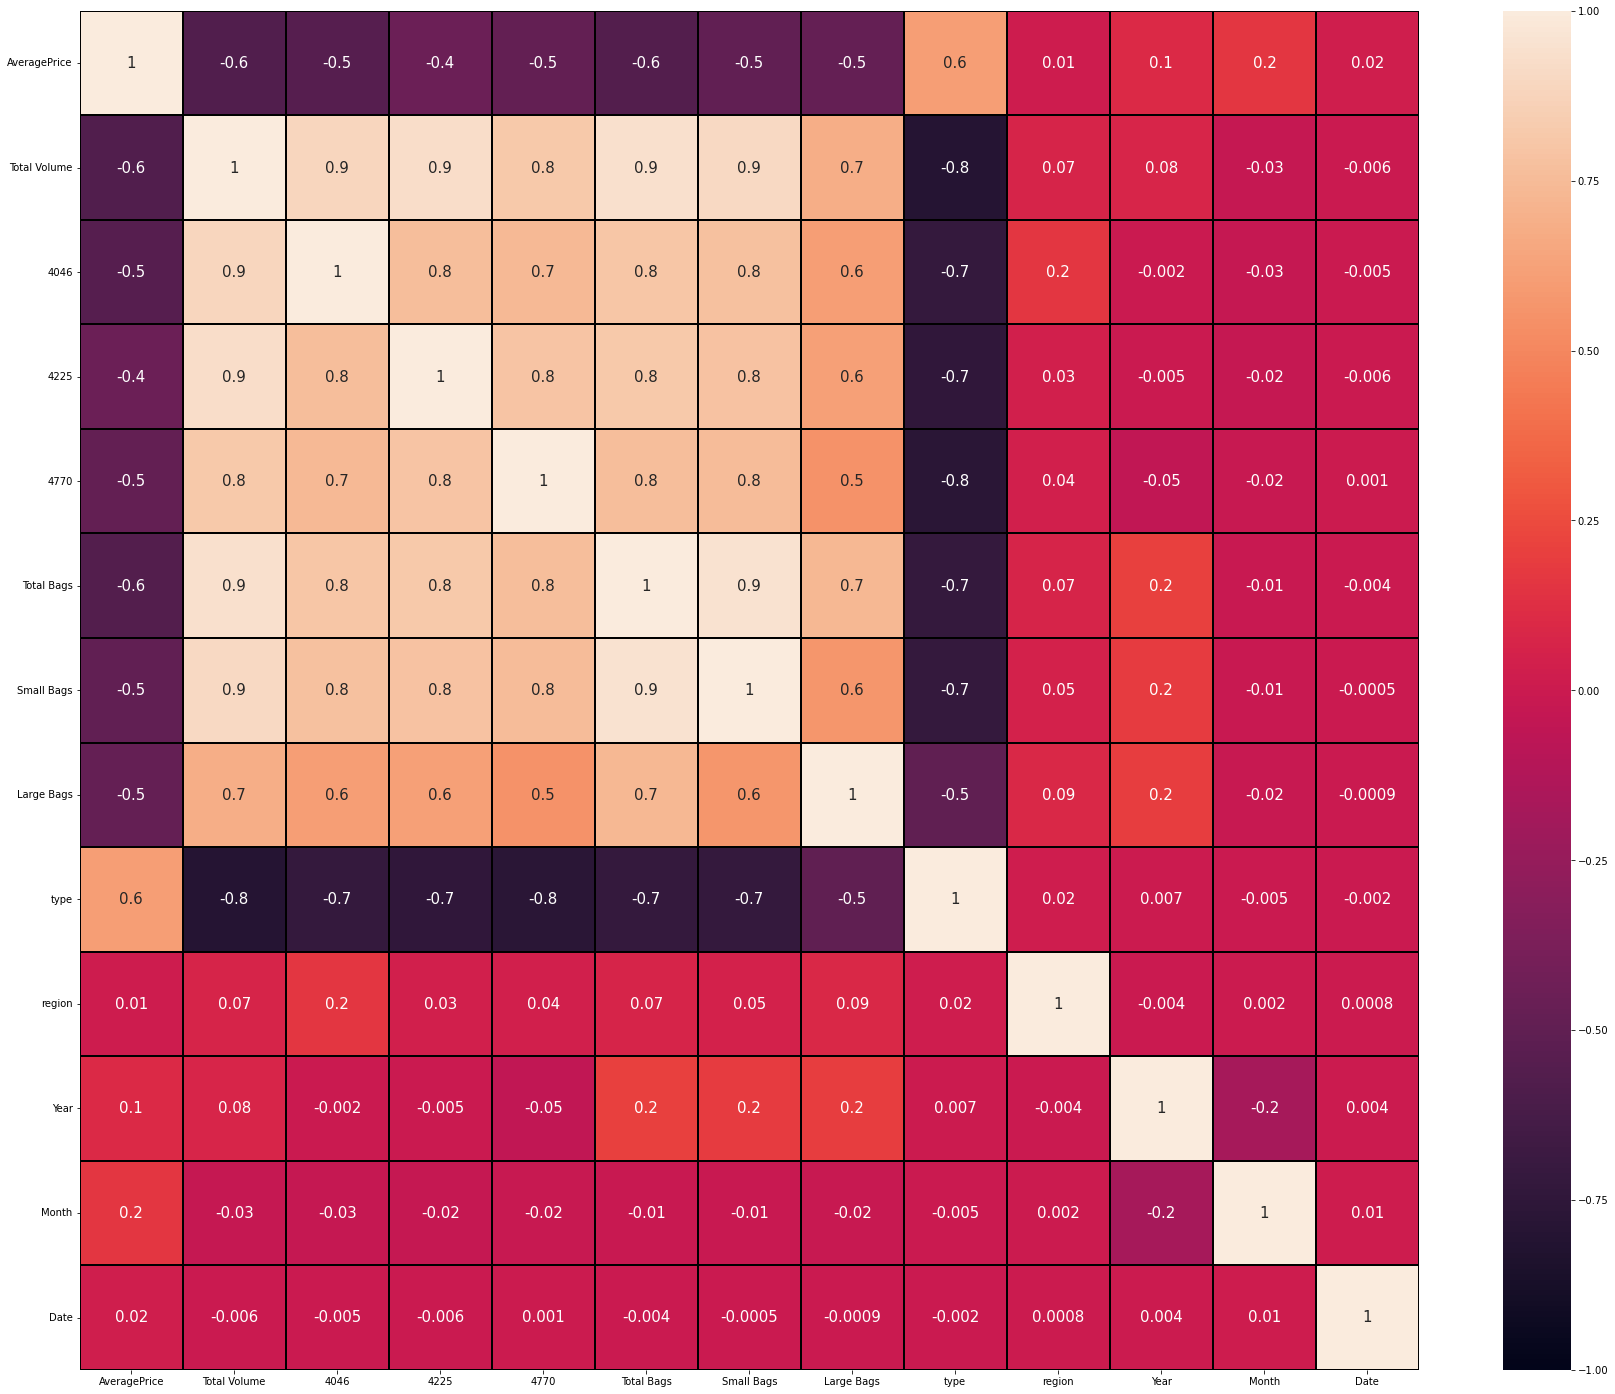

In [23]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(30,25))
sns.heatmap(new_df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', linecolor='black', annot = True, annot_kws={'size':15})
plt.yticks(rotation=0);

In [24]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Date            0.000751
Year           -0.003610
Name: region, dtype: float64

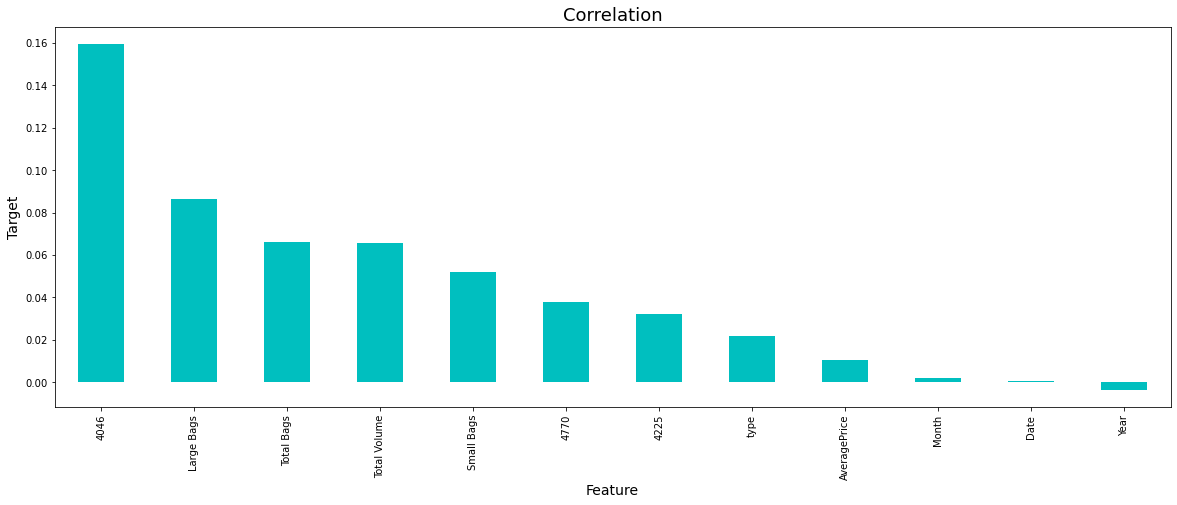

In [25]:
plt.figure(figsize=(20,7))
new_df1.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Target', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

From above bar plot, we can see that there is no relation with Date, Year, Month and type. So we will drop these column.

In [25]:
# Dropping irrelevant columns
new_df1.drop("Month",axis=1, inplace=True)
new_df1.drop("Date",axis=1, inplace=True)
new_df1.drop("Year",axis=1, inplace=True)

#### Data preprocessing

Separating the independent and target variables into x and y

In [26]:
x = new_df1.drop("region", axis=1)
y = new_df1["region"]

In [28]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0
...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1


##### Scaling data using Standar Scaler

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type
0,-0.212660,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443
1,-0.162942,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443
2,-1.207026,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443
3,-0.834139,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443
4,-0.336956,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443


##### Variance Inflation Factor(VIF)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

vif

,VIF values,Features
0,1.941903,AveragePrice
1,52.803808,Total Volume
2,6.694036,4046
3,11.900149,4225
4,3.756094,4770
5,34.110791,Total Bags
6,17.194519,Small Bags
7,3.434390,Large Bags
8,3.717587,type


In [29]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [30]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.884951,AveragePrice
1,3.485772,4046
2,4.355346,4225
3,3.742073,4770
4,25.424143,Total Bags
5,17.184510,Small Bags
6,3.381470,Large Bags
7,3.617215,type


In [31]:
# Dropping the feature Total Volume
x.drop("Total Bags",axis=1, inplace=True)

In [32]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.782355,AveragePrice
1,3.485146,4046
2,4.167858,4225
3,3.738406,4770
4,3.509222,Small Bags
5,1.840231,Large Bags
6,3.603878,type


## Modeling

##### Finding best random state

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [34]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7955465587044535  on Random_state  89


Here we are getting accuracy score of 79.55% with Random state 89

Now splitting the data for Training and Testing purpose. 75% we are considering for Training and 25% for Testing purpose

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

#### Logistic Regression

In [36]:
# Checking accuracy score for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))


0.4502923976608187
[[46  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  1]
 [ 0  0 54 ...  0  0  1]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  3  1 ...  0  0  8]]
              precision    recall  f1-score   support

           0       0.42      0.52      0.46        88
           1       0.15      0.27      0.19        77
           2       0.67      0.56      0.61        96
           3       0.47      0.31      0.37        81
           4       0.42      0.43      0.43        88
           5       0.52      0.39      0.45        85
           6       0.64      0.77      0.70        73
           7       0.42      0.39      0.40        93
           8       0.64      0.79      0.71        99
           9       0.45      0.79      0.57        73
          10       0.40      0.32      0.36        65
          11       0.55      0.61      0.58        76
          12       0.35      0.49      0.41        81
          13       0.11      0.02      0.04        91
          14  

#### KNeighbors Classifier

In [37]:
# Checking accuracy score for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.8427800269905533
[[78  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  0  2 ...  0  0 56]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        88
           1       0.71      0.79      0.75        77
           2       0.94      0.96      0.95        96
           3       0.83      0.79      0.81        81
           4       0.87      0.88      0.87        88
           5       0.82      0.75      0.79        85
           6       0.93      0.95      0.94        73
           7       0.81      0.92      0.86        93
           8       0.97      0.96      0.96        99
           9       0.77      0.85      0.81        73
          10       0.78      0.72      0.75        65
          11       0.86      0.95      0.90        76
          12       0.91      0.95      0.93        81
          13       0.76      0.70      0.73        91
          14  

#### Decision Tree Classifier

In [38]:
# Checking accuracy score for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7908232118758435
[[66  0  0 ...  0  0  0]
 [ 0 54  0 ...  0  0  1]
 [ 0  0 84 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 72  0]
 [ 0  2  0 ...  0  0 49]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.79        88
           1       0.64      0.70      0.67        77
           2       0.94      0.88      0.91        96
           3       0.88      0.74      0.81        81
           4       0.84      0.76      0.80        88
           5       0.72      0.71      0.71        85
           6       0.95      0.95      0.95        73
           7       0.80      0.81      0.80        93
           8       0.92      0.94      0.93        99
           9       0.82      0.79      0.81        73
          10       0.66      0.71      0.68        65
          11       0.85      0.91      0.88        76
          12       0.87      0.88      0.87        81
          13       0.77      0.81      0.79        91
          14  

#### Random Forest Classifier

In [39]:
# Checking accuracy score for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8895636527215475
[[80  0  0 ...  0  0  0]
 [ 0 67  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 73  0]
 [ 0  1  1 ...  0  0 65]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        88
           1       0.80      0.87      0.83        77
           2       0.97      0.97      0.97        96
           3       0.95      0.77      0.85        81
           4       0.91      0.88      0.89        88
           5       0.86      0.74      0.80        85
           6       0.96      0.99      0.97        73
           7       0.91      0.97      0.94        93
           8       0.97      0.96      0.96        99
           9       0.89      0.92      0.91        73
          10       0.79      0.80      0.79        65
          11       0.90      0.92      0.91        76
          12       0.96      0.94      0.95        81
          13       0.89      0.89      0.89        91
          14  

#### Support Vector Machine Classifier

In [40]:
# Checking accuracy score for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7663067926225821
[[81  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 85 ...  0  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  3 ...  0  0 45]]
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        88
           1       0.55      0.68      0.60        77
           2       0.93      0.89      0.91        96
           3       0.82      0.63      0.71        81
           4       0.82      0.75      0.79        88
           5       0.69      0.64      0.66        85
           6       0.95      0.95      0.95        73
           7       0.76      0.76      0.76        93
           8       0.96      0.96      0.96        99
           9       0.64      0.86      0.74        73
          10       0.53      0.78      0.63        65
          11       0.87      0.86      0.86        76
          12       0.85      0.94      0.89        81
          13       0.60      0.47      0.53        91
          14  

#### Gradient Boosting Classifier

In [44]:
# Checking accuracy score for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.811965811965812
[[60  0  0 ...  0  0  0]
 [ 0 63  0 ...  0  0  0]
 [ 0  0 80 ...  0  0  0]
 ...
 [ 0  0  0 ... 39  1  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  1  2 ...  0  0 55]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        76
           1       0.78      0.67      0.72        94
           2       0.91      0.93      0.92        86
           3       0.84      0.75      0.79        95
           4       0.85      0.69      0.77       101
           5       0.72      0.72      0.72        83
           6       0.94      0.87      0.90        70
           7       0.85      0.79      0.82       100
           8       0.99      0.93      0.96        81
           9       0.84      0.75      0.79        75
          10       0.60      0.71      0.65        79
          11       0.86      0.84      0.85        79
          12       0.91      0.90      0.90        67
          13       0.65      0.76      0.70        84
          14   

#### AdaBoost Classifier

In [45]:
# Checking accuracy score for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.04430949167791273
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 36  0  0]
 [ 0  0  0 ...  6  0  0]
 ...
 [ 0  0  0 ... 40  0  0]
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  8  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        76
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        86
           3       0.00      0.00      0.00        95
           4       0.00      0.00      0.00       101
           5       0.00      0.00      0.00        83
           6       0.00      0.00      0.00        70
           7       0.00      0.00      0.00       100
           8       0.04      0.46      0.07        81
           9       0.00      0.00      0.00        75
          10       0.00      0.00      0.00        79
          11       0.00      0.00      0.00        79
          12       0.00      0.00      0.00        67
          13       0.00      0.00      0.00        84
          14 

#### Checking the cross validation score

In [41]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())


0.34141362600970915


In [42]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.620281733478845


In [43]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5564020848954184


In [44]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6832118293338156


In [51]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6252873103400731


In [53]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.6027960203315885


In [55]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.0602865972228591


From the above observation, looking at the accuracy score and the cross validation score we conclude that Logistic Regression is our best fitting model

#### Hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Logistic Regression
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [47]:
GCV = GridSearchCV(LogisticRegression(), parameters, cv=5)

In [48]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [49]:
GCV.best_params_

{'C': 1000.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [50]:
Avacado_region = LogisticRegression(C= 1000.0, penalty="l2",solver = 'newton-cg' )
Avacado_region.fit(x_train, y_train)
pred = Avacado_region.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

49.167791273054426


After tuning, our best model score has increased

### Saving the model

In [53]:
# Saving the model using .pkl
import joblib
joblib.dump(Avacado_region,"Avocado_P_Region.pkl")

['Avocado_P_Region.pkl']

# Thank You !